# Application: Exploring Handwritten Digits
To demonstrate these principles on a more interesting proble, let's consider one piece of the optical character recognition prolem: the identification of handwritten digits. In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of preformatted digits, which is built into the library.

## Loading and Visualiying the Digits Data

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

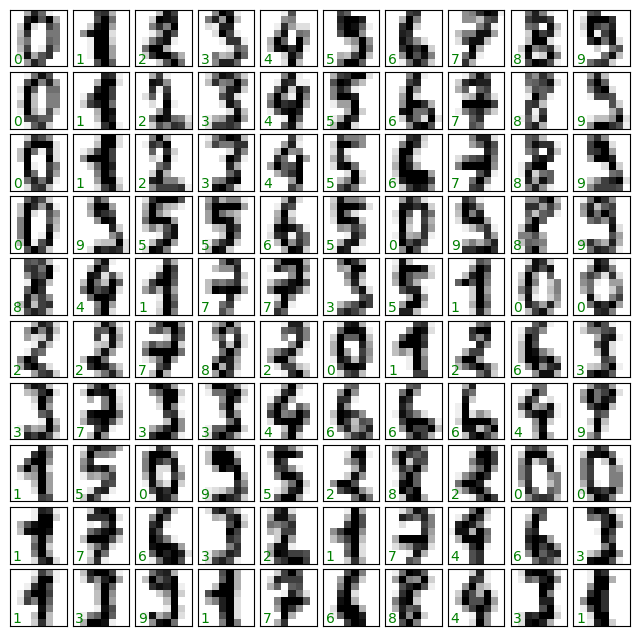

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In order to work with this data within Scikit-Learn, we need a two-dimensional, ```[n_samples, n_features]``` representation. We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays, so that we have a length=64 array of pixel values representing each digit. Additionally, we need the traget array, which gieves the previously determined label for each digit. These two quantities are built into the digits dataset under the data and target attributes.

In [5]:
x = digits.data
x.shape

(1797, 64)

In [6]:
y = digits.target
y.shape

(1797,)

we see here that there are 1,797 samples and 64 features.

## Unsupervised learning example: Dimensionality Reduction
We'd like to visualize our points with the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space. Instead, we'll reduce the number of dimensions, using an unsupervised method. Here, we'll make use of a manifold learning algorithm called Isomap (see chapter 46) and transform the data to two dimensions:

In [7]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print(data_projected.shape)

/home/florian/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/florian/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


/tmp/ipykernel_10417/153619618.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('viridis',10))


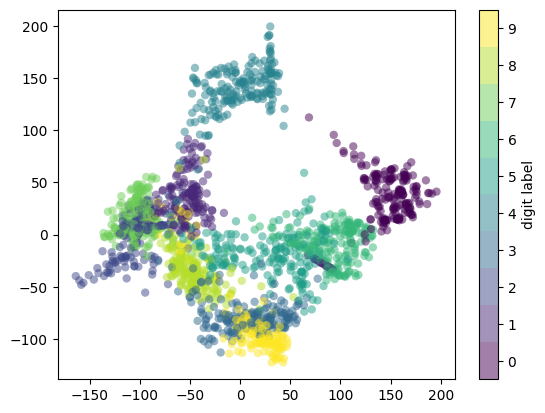

In [9]:
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target,
            edgecolors='None', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis',10))
plt.colorbar(label='digit label', ticks = range(10))
plt.clim(-0.5, 9.5)

## Classification on Digits
Let's apply a classification algorithm to the digits data. As we did with the iris data previously, we will pslit the data into training and testing sets and fit a Gaussian naive Bayes model:

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0)
model = GaussianNB()
model.fit(xtrain, ytrain)
y_model = model.predict(xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.8333333333333334

Even with this simple model, the accuracy is high. Where we might have gone wrong can be inspected in a *confusion matrix*, which we can compute with Scikit-Learn and plot with Seaborn.

Text(113.9222222222222, 0.5, 'true value')

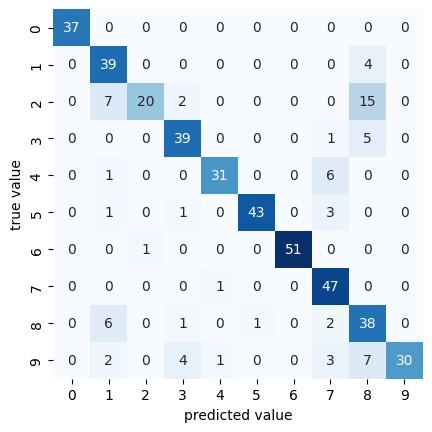

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value')

This shows us where the mislabeled points tend to be: for exmple, may of the twos here are misclassified as either ones or eights.

Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. We'll use green for correct labels and red for incorrect labels.

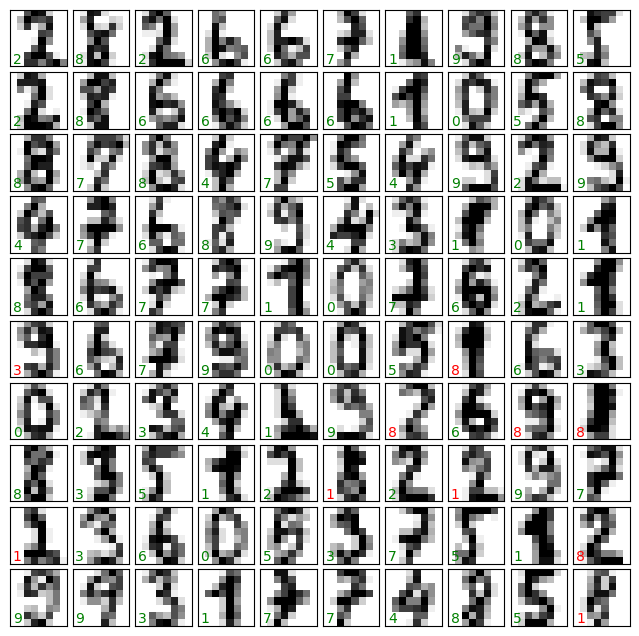

In [13]:
fig, axes = plt.subplots(10, 10, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = xtest.reshape(-1,8,8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')